In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('dataset_23.csv')


Medidas estatísticas descritivas (variáveis numéricas):
                       Média  Mediana  Desvio Padrão  Mínimo  Máximo  \
cpu_cores           8.224044     9.00       4.028616   2.000   15.00   
ram_gb              8.579235     8.00       3.791692   4.000   17.00   
latencia_ms       161.390848   174.30      84.824124   1.410  299.11   
armazenamento_tb    0.964897     1.00       0.672753   0.256    2.00   
tempo_resposta    152.173388   104.72     105.327268  52.760  407.90   

                  1º Quartil  3º Quartil  Valores Nulos  
cpu_cores              5.000      11.500              0  
ram_gb                 5.000      11.000              0  
latencia_ms           94.090     235.180             18  
armazenamento_tb       0.512       2.000             18  
tempo_resposta        76.185     187.405              0  

Resumo das Variáveis Categóricas:

Variável               Categorias                               Categoria mais frequente            Valores Nulos
------------

c:\Users\Kleuber Campos\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kleuber Campos\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kleuber Campos\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kleuber Campos\AppData\Local\Programs\Python\Python311\Lib\site-packages\sea

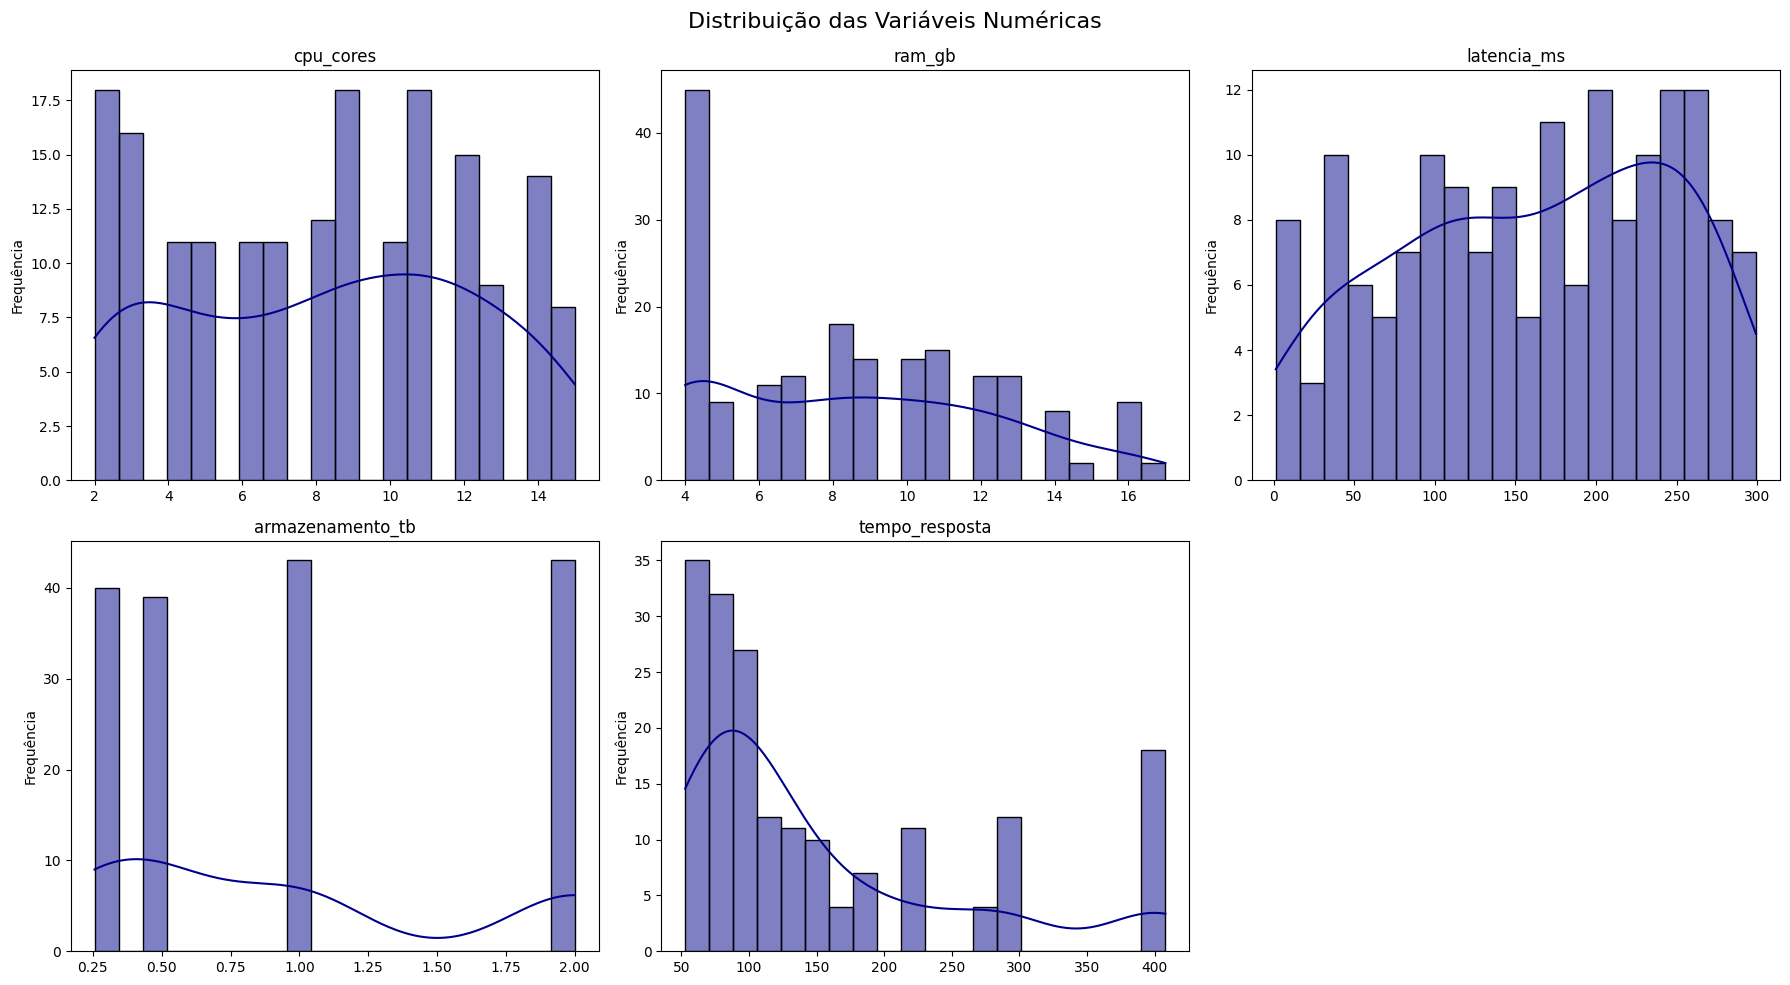

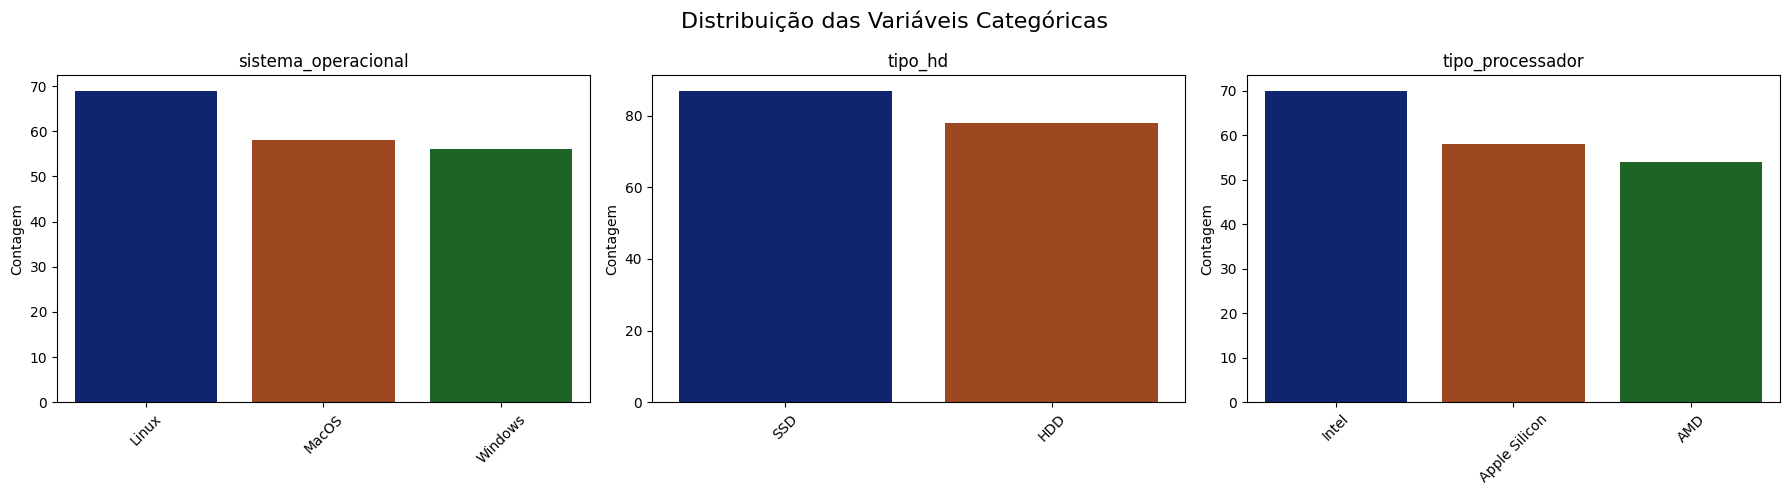

In [18]:
numericas = df.select_dtypes(include=['int64', 'float64']).columns
n_num = len(numericas)
estatisticas = df[numericas].describe().T
estatisticas['Mediana'] = df[numericas].median()
estatisticas['Assimetria (Skew)'] = df[numericas].skew()
estatisticas['Curtose'] = df[numericas].kurtosis()
estatisticas['Valores Nulos'] = df[numericas].isnull().sum()
estatisticas = estatisticas.rename(columns={
    'mean': 'Média',
    'std': 'Desvio Padrão',
    'min': 'Mínimo',
    '25%': '1º Quartil',
    '50%': '2º Quartil',
    '75%': '3º Quartil',
    'max': 'Máximo'
})

print("\nMedidas estatísticas descritivas (variáveis numéricas):")
print(estatisticas[['Média', 'Mediana', 'Desvio Padrão', 'Mínimo', 'Máximo', '1º Quartil', '3º Quartil', 'Valores Nulos']])

categ_vars = df.select_dtypes(include='object').columns
n_cat = len(categ_vars)

print("\nResumo das Variáveis Categóricas:\n")
print(f"{'Variável':<22} {'Categorias':<40} {'Categoria mais frequente':<35} {'Valores Nulos'}")
print("-"*115)
for var in categ_vars:
    categorias = df[var].dropna().unique()
    contagem = df[var].value_counts(dropna=False)
    mais_freq = contagem.idxmax()
    freq_valor = contagem.max()
    n_nulos = df[var].isnull().sum()
    categorias_str = f"{len(categorias)} ({', '.join(map(str, categorias))})"
    freq_str = f"{mais_freq} ({freq_valor} ocorrências)"
    print(f"{var:<22} {categorias_str:<40} {freq_str:<35} {n_nulos}")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)

for i, col in enumerate(numericas):
    row, col_idx = divmod(i, 3)
    sns.histplot(df[col], kde=True, bins=20, ax=axes[row][col_idx], color='darkblue')
    axes[row][col_idx].set_title(f'{col}')
    axes[row][col_idx].set_xlabel('')
    axes[row][col_idx].set_ylabel('Frequência')

for j in range(n_num, 6):
    row, col_idx = divmod(j, 3)
    fig.delaxes(axes[row][col_idx])

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
fig.suptitle('Distribuição das Variáveis Categóricas', fontsize=16)

for i, var in enumerate(categ_vars):
    sns.countplot(x=df[var], order=df[var].value_counts().index, ax=axes[i], palette='dark')
    axes[i].set_title(f'{var}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Contagem')

for j in range(n_cat, 3):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

                            OLS Regression Results                            
Dep. Variable:         tempo_resposta   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     100.1
Date:                Mon, 05 May 2025   Prob (F-statistic):           4.95e-61
Time:                        18:07:39   Log-Likelihood:                -953.70
No. Observations:                 183   AIC:                             1925.
Df Residuals:                     174   BIC:                             1954.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

c:\Users\Kleuber Campos\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\Kleuber Campos\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


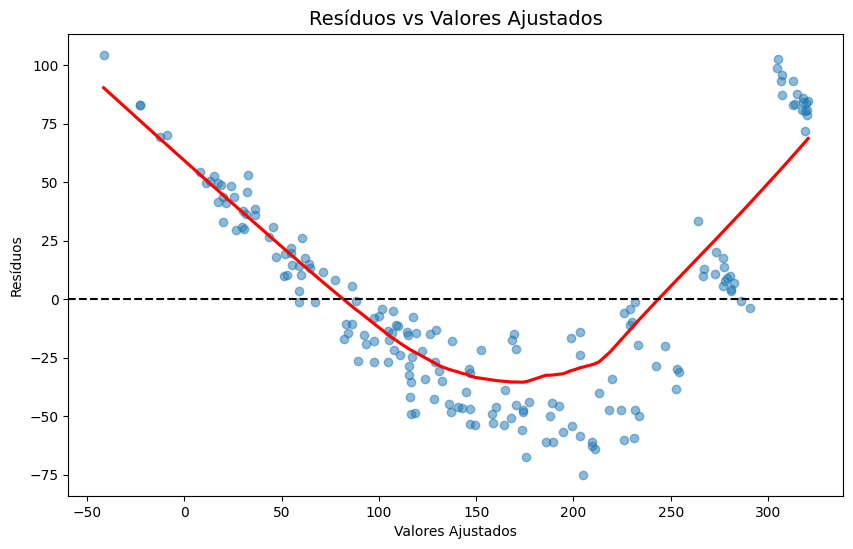


Teste de Breusch-Pagan:
Estatística: 27.1835, p-valor: 0.0013
Heterocedasticidade presente


In [19]:
# Tratar valores nulos em variáveis numéricas com a mediana
numeric_cols = ['cpu_cores', 'ram_gb', 'latencia_ms', 'armazenamento_tb']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(df[col].median())

# Tratar valores nulos em variáveis categóricas com a moda
categorical_cols = ['sistema_operacional', 'tipo_hd', 'tipo_processador']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0]).astype(str)

# Codificar variáveis categóricas com dummies (excluindo a primeira categoria)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Converter todas as colunas para tipo float
df_encoded = df_encoded.astype(float)

# Remover colunas completamente nulas, se houver
df_encoded = df_encoded.dropna(axis=1, how='all')

# Separar variável dependente e independentes
y = df_encoded['tempo_resposta']
X = df_encoded.drop('tempo_resposta', axis=1)

# Adicionar constante (intercepto) ao modelo
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(modelo.summary())

# DIAGNÓSTICO DE MULTICOLINEARIDADE (VIF)
vif_data = pd.DataFrame(columns=['Variável', 'VIF'])

X_numeric = X.select_dtypes(include=[np.number])
X_filtered = X_numeric.loc[:, X_numeric.std() > 1e-6]

for i, col in enumerate(X_filtered.columns):
    try:
        vif = variance_inflation_factor(X_filtered.values, i)
        if np.isfinite(vif):
            vif_data.loc[len(vif_data)] = [col, vif]
    except:
        continue

vif_data = vif_data.sort_values('VIF', ascending=False)
print(vif_data)

# DIAGNÓSTICO DE HETEROCEDASTICIDADE
plt.figure(figsize=(10, 6))
sns.regplot(x=modelo.fittedvalues, y=modelo.resid, lowess=True, 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.axhline(y=0, color='k', linestyle='--')
plt.title('Resíduos vs Valores Ajustados', fontsize=14)
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()

bp_test = sms.het_breuschpagan(modelo.resid, modelo.model.exog)
print("\nTeste de Breusch-Pagan:")
print(f"Estatística: {bp_test[0]:.4f}, p-valor: {bp_test[1]:.4f}")
print("Heterocedasticidade presente" if bp_test[1] < 0.05 else "Sem heterocedasticidade significativa")

In [20]:
# MODELO 1: todas as variáveis
X1 = df_encoded.drop(columns=['tempo_resposta'])
X1 = sm.add_constant(X1)
y = df_encoded['tempo_resposta']
modelo1 = sm.OLS(y, X1).fit()

print("="*80)
print("MODELO 1: COM TODAS AS VARIÁVEIS")
print("="*80)
print(modelo1.summary())

# MODELO 2: excluindo variável com alta multicolinearidade (ram_gb)
X2 = df_encoded.drop(columns=['tempo_resposta', 'ram_gb'])
X2 = sm.add_constant(X2)
modelo2 = sm.OLS(y, X2).fit()

print("\n" + "="*80)
print("MODELO 2: SEM A VARIÁVEL 'ram_gb'")
print("="*80)
print(modelo2.summary())

# COMPARATIVO ENTRE OS MODELOS
print("\n" + "="*80)
print("COMPARATIVO ENTRE OS MODELOS")
print("="*80)
dados_comparacao = {
    'Métrica': ['R²', 'R² Ajustado', 'Estatística F', 'p-valor (F)', 'Número de variáveis'],
    'Modelo 1 (Completo)': [
        round(modelo1.rsquared, 4),
        round(modelo1.rsquared_adj, 4),
        round(modelo1.fvalue, 4),
        f"{modelo1.f_pvalue:.4e}",
        int(modelo1.df_model)
    ],
    'Modelo 2 (Sem ram_gb)': [
        round(modelo2.rsquared, 4),
        round(modelo2.rsquared_adj, 4),
        round(modelo2.fvalue, 4),
        f"{modelo2.f_pvalue:.4e}",
        int(modelo2.df_model)
    ]
}
df_comparativo = pd.DataFrame(dados_comparacao)
print(df_comparativo.to_string(index=False))

MODELO 1: COM TODAS AS VARIÁVEIS
                            OLS Regression Results                            
Dep. Variable:         tempo_resposta   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     100.1
Date:                Mon, 05 May 2025   Prob (F-statistic):           4.95e-61
Time:                        18:07:40   Log-Likelihood:                -953.70
No. Observations:                 183   AIC:                             1925.
Df Residuals:                     174   BIC:                             1954.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------